# Principal Component Analysis with Cancer Data

In [238]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore


import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [239]:
cancer_df = pd.read_csv("..\\dataset\\breast-cancer-wisconsin-data.csv")  



In [240]:
cancer_df.head()
cancer_df.tail()
cancer_df.info()
cancer_df.shape
cancer_df.isnull().sum().sum()
cancer_df.isna().sum().sum()
cancer_df.describe().transpose()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


(699, 11)

0

0

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [241]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
cancer_df.drop("ID",axis=1,inplace=True)





# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [242]:
cancer_df.shape
cancer_df.info()
cancer_df.describe()

(699, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [243]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
cancer_df.isnull().sum().sum()
cancer_df.isna().sum().sum()

0

0

In [244]:
# No missing values found. So let us try to remove ? from bare nuclei column
cancer_df = cancer_df.replace('?', np.nan)

# Get count of rows having ?
cancer_df.isnull().sum().sum()
cancer_df.isna().sum().sum()


16

16

In [245]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

cancer_df = cancer_df.fillna(cancer_df.median())
cancer_df["Bare Nuclei"]= cancer_df["Bare Nuclei"].astype('int64') 
cancer_df.isnull().sum().sum()
cancer_df.isna().sum().sum()


0

0

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x295a952b320>)

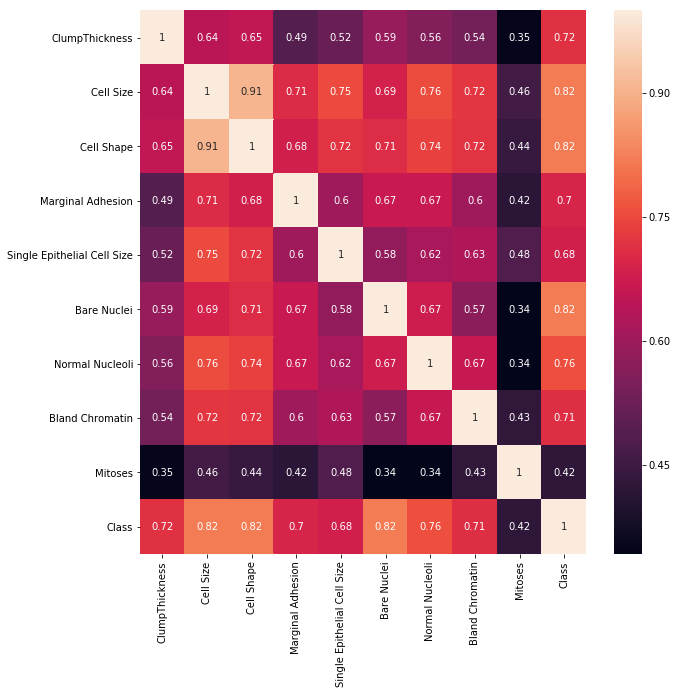

In [246]:
# Check for correlation of variable
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sn
corrmat = cancer_df.corr()
pyplot.subplots(figsize = (10,10))
sn.heatmap(corrmat, annot=True)

In [247]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

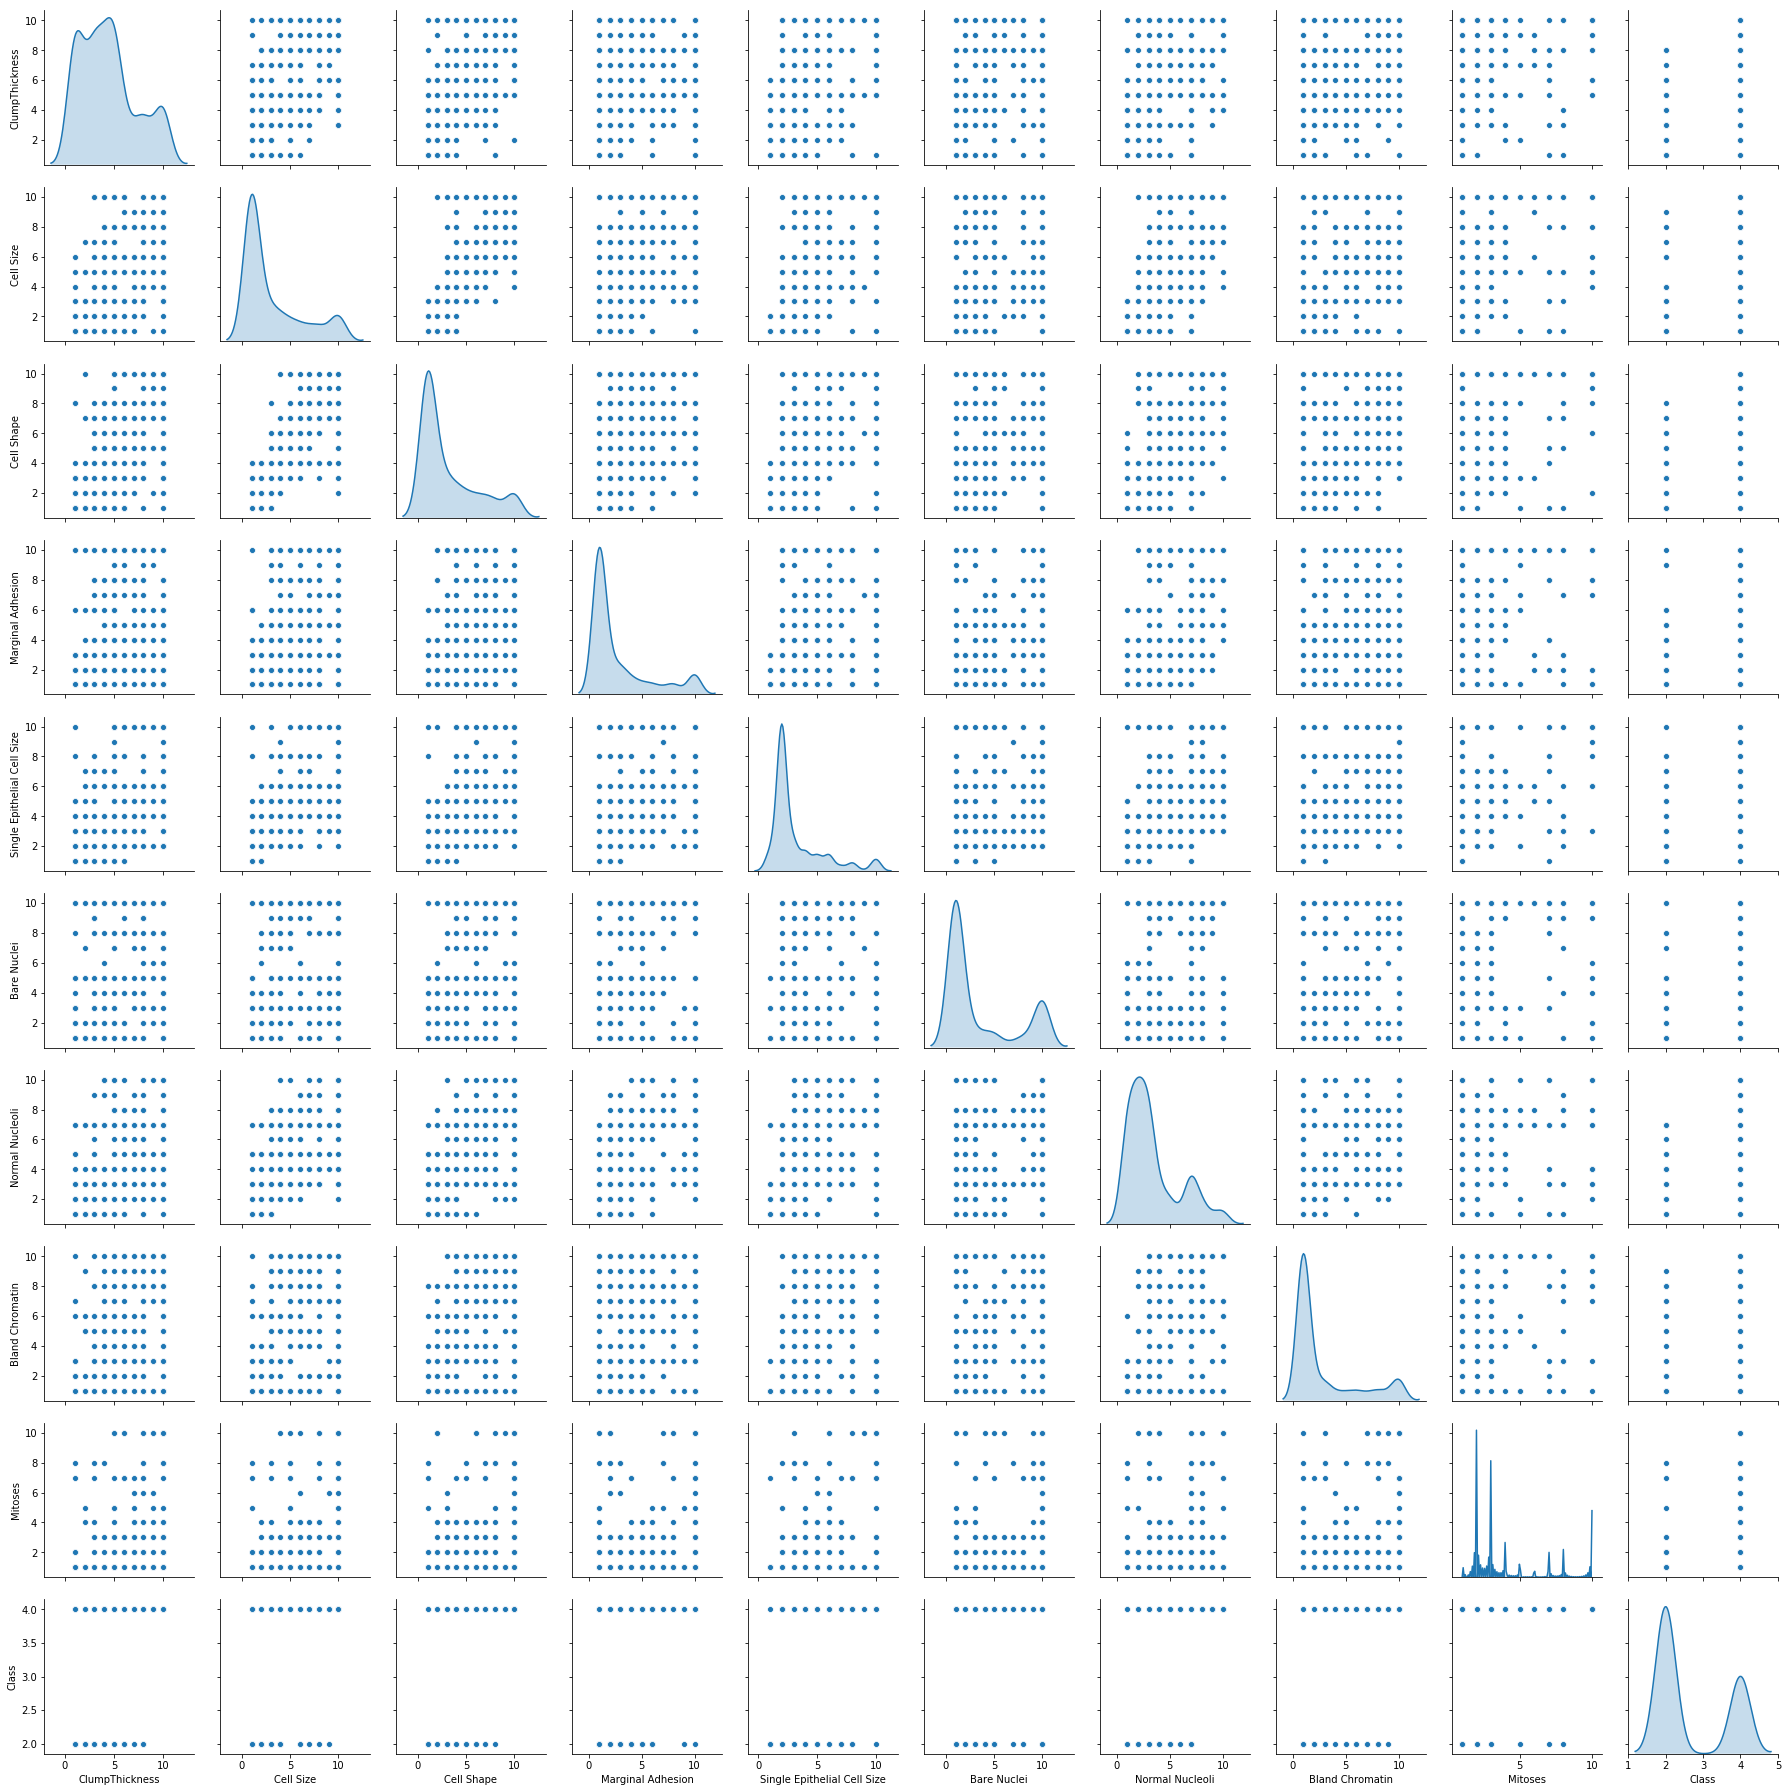

In [248]:
#Let us check for pair plots
sns.pairplot(cancer_df, diag_kind='kde') 


In [249]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [250]:
from scipy.stats import zscore
cancer_df_z  = cancer_df.apply(zscore)
cancer_df_z.describe()
cancer_df_z = cancer_df_z[(np.abs(cancer_df_z) < 3).all(axis=1)]
# We could see most of the outliers are now removed.

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02,6.990000e+02
mean,1.655011e-16,-2.801765e-16,-5.854481e-16,-1.477121e-16,-1.021199e-15,7.026648e-16,6.251556e-16,3.874662e-16,7.093356e-16,8.697541e-16
std,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00,1.000716e+00
min,-1.214667e+00,-6.999951e-01,-7.432990e-01,-6.332472e-01,-1.001495e+00,-6.869792e-01,-1.000471e+00,-6.118250e-01,-3.439118e-01,-7.253970e-01
25%,-8.592662e-01,-6.999951e-01,-7.432990e-01,-6.332472e-01,-5.495614e-01,-6.869792e-01,-5.900668e-01,-6.118250e-01,-3.439118e-01,-7.253970e-01
50%,-1.484649e-01,-6.999951e-01,-7.432990e-01,-6.332472e-01,-5.495614e-01,-6.869792e-01,-1.796621e-01,-6.118250e-01,-3.439118e-01,-7.253970e-01
75%,5.623364e-01,6.117919e-01,6.035993e-01,4.181537e-01,3.543054e-01,4.181956e-01,6.411472e-01,3.713145e-01,-3.439118e-01,1.378555e+00
max,1.983939e+00,2.251526e+00,2.287222e+00,2.520955e+00,3.065906e+00,1.799664e+00,2.693171e+00,2.337594e+00,4.907421e+00,1.378555e+00


ClumpThickness                     AxesSubplot(0.125,0.71587;0.168478x0.16413)
Cell Size                       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Cell Shape                      AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Marginal Adhesion               AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Single Epithelial Cell Size       AxesSubplot(0.125,0.518913;0.168478x0.16413)
Bare Nuclei                    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Normal Nucleoli                AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Bland Chromatin                AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Mitoses                           AxesSubplot(0.125,0.321957;0.168478x0.16413)
Class                          AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

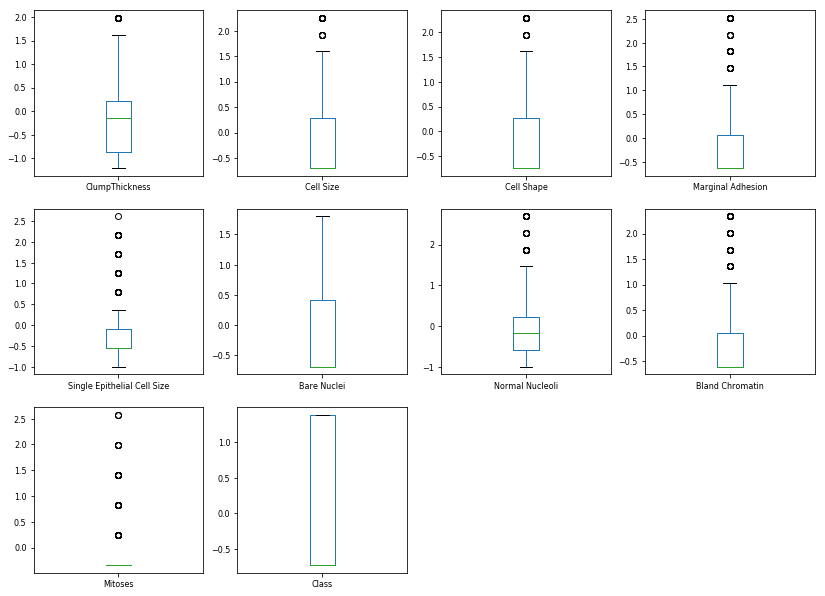

In [251]:
# box and whisker plots
cancer_df_z.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))
pyplot.show()

In [252]:
from sklearn.model_selection import train_test_split
X =  cancer_df_z.drop("Class", axis=1)
y =  cancer_df_z["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(453, 9)
(195, 9)
(195,)


# Q6 Create a covariance matrix for identifying Principal components

In [253]:
# PCA
# Step 1 - Create covariance matrix
#sc = StandardScaler()
#X_train_std =  sc.fit_transform(X_train)  
#X_train_std.mean(axis = 0)
#X_train_std.std(axis = 0)
train_cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[0.97507434 0.60798827 0.6092948  0.46958223 0.40406395 0.57706875
  0.54843385 0.49841845 0.16644688]
 [0.60798827 0.8913542  0.77861106 0.59821835 0.51945335 0.60653473
  0.66550099 0.63916506 0.19069478]
 [0.6092948  0.77861106 0.85166605 0.5712635  0.48495167 0.59871858
  0.63348873 0.62132123 0.16373382]
 [0.46958223 0.59821835 0.5712635  0.8575629  0.39768039 0.58085419
  0.57234202 0.49295104 0.15858745]
 [0.40406395 0.51945335 0.48495167 0.39768039 0.56983896 0.42213712
  0.45115397 0.44947016 0.1410851 ]
 [0.57706875 0.60653473 0.59871858 0.58085419 0.42213712 0.94158506
  0.57833433 0.47803043 0.18285537]
 [0.54843385 0.66550099 0.63348873 0.57234202 0.45115397 0.57833433
  0.90048056 0.58037022 0.14828057]
 [0.49841845 0.63916506 0.62132123 0.49295104 0.44947016 0.47803043
  0.58037022 0.89544757 0.17199279]
 [0.16644688 0.19069478 0.16373382 0.15858745 0.1410851  0.18285537
  0.14828057 0.17199279 0.20201968]]


# Q7 Identify eigen values and eigen vector

In [254]:
# Step 2- Get eigen values and eigen vector

In [255]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)





Eigen Vectors 
%s [[ 3.48026941e-01  5.79985708e-01  6.38575946e-01 -3.75286745e-02
   4.30707236e-02 -1.05795796e-01  2.35600618e-01  1.53891123e-01
  -2.02652957e-01]
 [ 3.95398735e-01 -1.70920466e-01  6.91365085e-02 -6.97575854e-01
  -2.04567610e-01  2.47094914e-01 -7.47844959e-03 -4.69141883e-01
  -5.19031451e-04]
 [ 3.83369527e-01 -1.19354935e-01  1.09499444e-01  6.66841452e-01
   1.11798456e-01  4.25614539e-01 -2.57279448e-02 -4.32958702e-01
  -1.87818940e-02]
 [ 3.35900908e-01  4.06772920e-02 -5.90589582e-01  1.24473852e-02
   6.13280330e-02 -1.00675667e-01  3.68216691e-01  7.77855051e-02
  -6.17279606e-01]
 [ 2.71002909e-01 -1.64917633e-01  4.10792604e-02  6.44734636e-02
   2.45910920e-01 -8.16923119e-01 -2.13569465e-01 -3.35514236e-01
   8.65908899e-02]
 [ 3.55121628e-01  5.13701162e-01 -3.91937538e-01 -5.22120883e-02
   9.57527901e-02  1.28721446e-01 -5.72387856e-01  1.66893378e-01
   2.69145954e-01]
 [ 3.66009583e-01 -1.37571687e-01 -1.26209576e-01  5.46131005e-02
  -1.06946

# Q8 Find variance and cumulative variance by each eigen vector

In [256]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

In [257]:
var_explained
cum_var_exp

[0.6792956346205853,
 0.07029383008820053,
 0.06462658653559286,
 0.04280895118373891,
 0.04016420432416383,
 0.03887602718240764,
 0.03082629977476997,
 0.020926647850941775,
 0.01218181843959913]

array([0.67929563, 0.74958946, 0.81421605, 0.857025  , 0.89718921,
       0.93606523, 0.96689153, 0.98781818, 1.        ])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [258]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_train_std)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[0.64838839 0.0897644  0.05606309 0.05287567]
[53.41869816 19.87594373 15.70775764 15.25469854]


In [259]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(train_eigvectors_sorted[0:4])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X_train_std,P_reduce.T)   # projecting original  data into principal component dimensions

X_std_4D_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

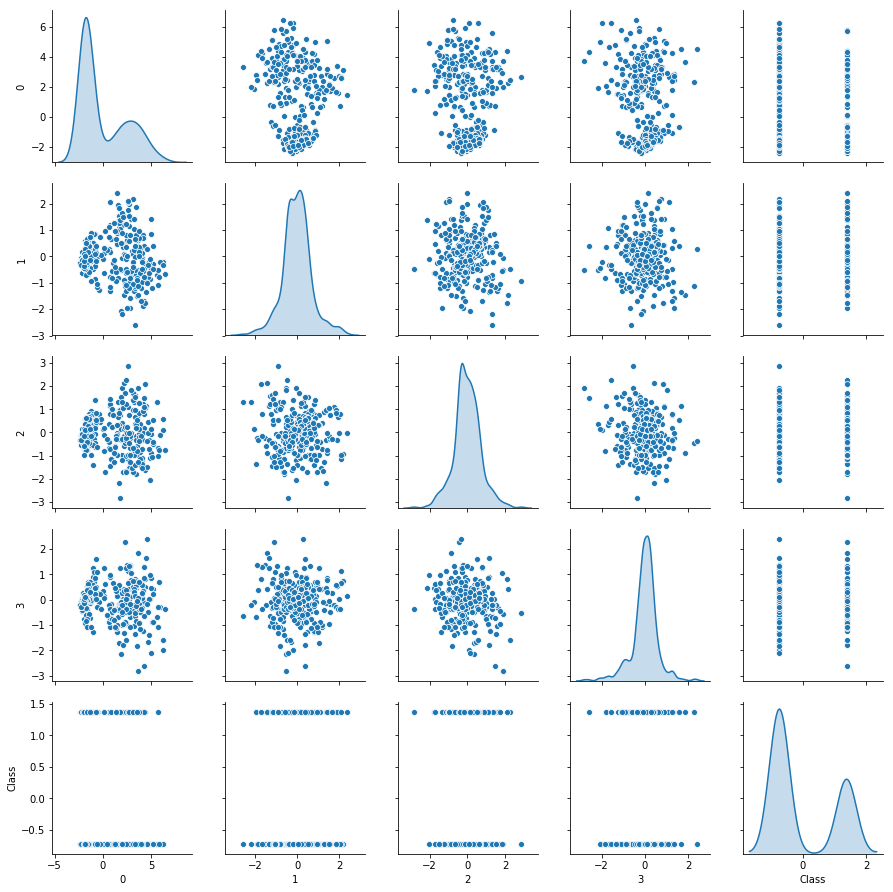

In [260]:
#Let us check it visually
Proj_data_cancer_df = X_std_4D_df.join(y)

sns.pairplot(Proj_data_cancer_df, diag_kind='kde') 

# Q10 Find correlation between components and features

<BarContainer object of 9 artists>

Text(0,0.5,'Explained variance ratio')

Text(0.5,0,'Principal components')

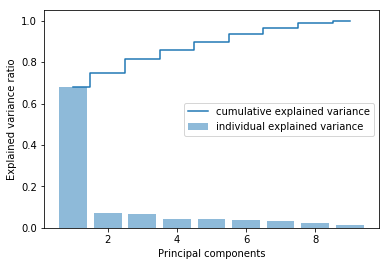

In [261]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x295b235f160>)

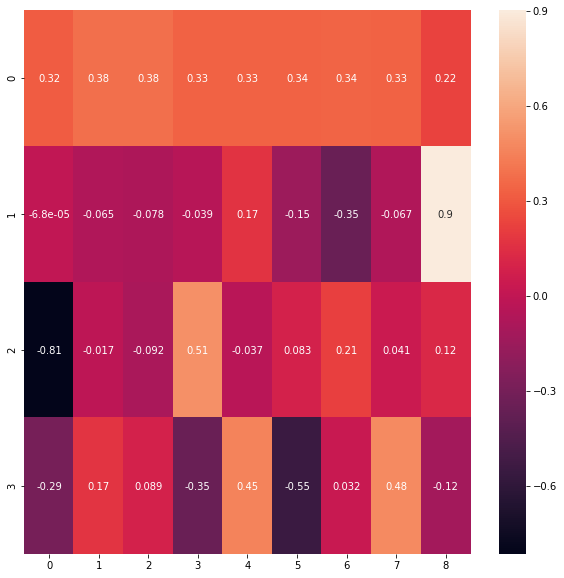

In [262]:
corrmat = pd.DataFrame(pca.components_)
pyplot.subplots(figsize = (10,10))
sns.heatmap(corrmat, annot=True)

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [263]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
import time
from sklearn.externals import joblib
import Recommenders as Recommenders
import Evaluation as Evaluation

ratings = pd.read_csv("..\\dataset\\jokes.csv",header=None, skiprows=1)  




In [264]:
ratings.head()
ratings.tail()
ratings.info()
ratings.shape
ratings.isnull().sum().sum()
ratings.isna().sum().sum()
ratings.describe().transpose()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,37,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24982,72,2.43,2.67,-3.98,4.27,-2.28,7.33,2.33,4.56,6.75,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, 0 to 100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


(24983, 101)

0

0

,count,mean,std,min,25%,50%,75%,max
0,24983.0,72.467478,21.859600,36.00,53.000,72.00,100.00,100.0
1,24983.0,34.401435,46.707059,-9.95,-0.150,5.05,99.00,99.0
2,24983.0,27.094089,44.228006,-9.95,-2.180,3.69,99.00,99.0
3,24983.0,33.263717,46.747535,-9.95,-1.145,4.66,99.00,99.0
4,24983.0,36.244936,48.812967,-9.95,-3.350,3.45,99.00,99.0
5,24983.0,0.427236,5.472657,-9.95,-3.690,1.12,4.47,99.0
6,24983.0,19.342119,37.860770,-9.95,-0.390,3.54,8.01,99.0
7,24983.0,-0.401803,5.741616,-9.95,-5.290,-0.05,3.93,99.0
8,24983.0,-0.616110,5.008894,-9.95,-4.610,-0.29,3.06,99.0
9,24983.0,36.228421,48.228364,-9.95,-1.775,4.03,99.00,99.0


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [265]:
ratings=ratings.iloc[:200,:]
ratings=ratings.iloc[:,1:]
ratings.head()

    

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 Change the column indices from 0 to 99

In [266]:

i = 0
for column in ratings:
    ratings = ratings.rename(columns={column: i})
    i = i+1
    
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [267]:
ratings.replace(99,0, inplace=True)

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [268]:

#train_data, test_data = train_test_split(jokes_df, test_size = 0.20, random_state=0)



sc = StandardScaler()
ratings_diff =  pd.DataFrame(sc.fit_transform(ratings))  
#ratings_diff.mean(axis = 0)
#ratings_diff.std(axis = 0)
#train_cov_matrix = np.cov(ratings_diff.T)
#print('Covariance Matrix \n%s', train_cov_matrix)



#pm = Recommenders.popularity_recommender_py()
#pm.create(train_data, 'user_id', 'joke')


# PCA
# Step 1 - Create covariance matrix


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [269]:
top_ratings = pd.DataFrame(ratings_diff.mean(axis=0))
top_ratings.sort_values(ascending = False, by = 0 ).head(10)



,0
98,1.840889e-16
81,1.243450e-16
97,1.198694e-16
20,1.065814e-16
94,1.054712e-16
92,8.770762e-17
47,7.771561e-17
73,7.743806e-17
99,7.549517e-17
49,7.494005e-17
